##  MI8

### MI BCCN  2022
### Tarek, Luisa,  Myriam


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as linalg
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson


### Exercise 2

In [16]:
def create_data (p):
    X = []
    Y = []
    if p ==3 : # as p is odd, it is not possible to have p/2 elements of each distribution, a random choice is made
        for i in range (2):
            X.append(np.concatenate((np.array([1]),np.random.multivariate_normal(np.array([0,1]).T, [[2,0],[0,2]]))))
            Y.append(1)
            X.append(np.concatenate((np.array([1]),np.random.multivariate_normal(np.array([1,0]).T, [[2,0],[0,2]]))))
            Y.append(-1)
        if np.random.randint(0,2) == 0 :
            X.append(np.concatenate((np.array([1]),np.random.multivariate_normal(np.array([0,1]).T, [[2,0],[0,2]]))))
            Y.append(1)
        else :
            X.append(np.concatenate((np.array([1]),np.random.multivariate_normal(np.array([1,0]).T, [[2,0],[0,2]]))))
            Y.append(-1)
    else:
        for i in range (int(p/2)):
            X.append(np.concatenate((np.array([1]),np.random.multivariate_normal(np.array([0,1]).T, [[2,0],[0,2]]))))
            Y.append(1)
            X.append(np.concatenate((np.array([1]),np.random.multivariate_normal(np.array([1,0]).T, [[2,0],[0,2]]))))
            Y.append(-1)
    return np.array(X).T,np.array(Y)

def optimum_weight(X,Y):
    W = np.dot (linalg.inv(np.dot(X,X.T)), np.dot(X,Y)) #added an identiy matrix to make sure it was inversable
    return W

def predictions(W,T):
    Y = []
    for i in T.T :
        h = np.dot(i,W)
        if h <0 :
            Y.append([-1])
        else :
            Y.append([1])
    
    return Y

def accuracy (Y_T, Y):
    A = 0
    for j in range (len(Y_T)):
        if Y_T[j] == Y[j] :
            A +=1
    return A/len(Y_T)

def test ():
    W_memory = []
    R_train = []
    R_test = []
    for p in ([3,4,6,8,10,20,40,100]):
        W_p = []
        R_train_p = []
        R_test_p =[]
        
        for q in range (50):
            
            X, Y_T = create_data(p)
            W_p.append(optimum_weight(X,Y_T))
            Y_train =  predictions(W_p[q], X)
            R_train_p.append(accuracy(Y_T,Y_train))
            
            X_t, Y_t = create_data(1000)
            Y_test = predictions(W_p[q],X_t)
            R_test_p.append(accuracy(Y_t,Y_test))

            
        W_memory.append(W_p)
        R_train.append(R_train_p)
        R_test.append(R_test_p)

    return W_memory,R_train,R_test

In [20]:
W_memory, R_train, R_test= test() #takes quite a long time

### a)

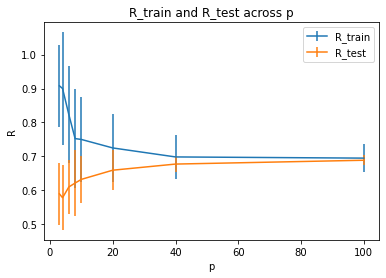

In [21]:
R_train_mean = [np.mean(i) for i in R_train]
R_train_sd = [np.std(i) for i in R_train]

R_test_mean = [np.mean(i) for i in R_test]
R_test_sd = [np.std(i) for i in R_test]

plt.errorbar([3,4,6,8,10,20,40,100], R_train_mean, yerr = R_train_sd, label = 'R_train')
plt.errorbar([3,4,6,8,10,20,40,100], R_test_mean, yerr = R_test_sd, label = 'R_test')
plt.title('R_train and R_test across p')
plt.xlabel('p')
plt.ylabel('R')
plt.legend()
plt.show()

### b)

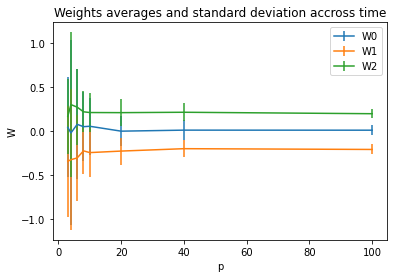

In [23]:
W_0_mean = [np.mean(np.array(i).T[0]) for i in  np.array(W_memory)]
W_1_mean = [np.mean(np.array(i).T[1]) for i in  np.array(W_memory)]
W_2_mean = [np.mean(np.array(i).T[2]) for i in  np.array(W_memory)]

W_0_sd = [np.std(np.array(i).T[0]) for i in  np.array(W_memory)]
W_1_sd = [np.std(np.array(i).T[1]) for i in  np.array(W_memory)]
W_2_sd = [np.std(np.array(i).T[2]) for i in  np.array(W_memory)]

plt.errorbar([3,4,6,8,10,20,40,100], W_0_mean, yerr = W_0_sd, label= 'W0')
plt.errorbar([3,4,6,8,10,20,40,100], W_1_mean, yerr = W_1_sd, label = 'W1')
plt.errorbar([3,4,6,8,10,20,40,100], W_2_mean, yerr = W_2_sd, label = 'W2')
plt.legend()
plt.title('Weights averages and standard deviation accross time')
plt.xlabel('p')
plt.ylabel('W')
plt.show()

### c)
A higher P will give a more reliable network, as the standard deviation being smaller, for both the Weights and the Accuracy, and the Test Accuracy will be higher. We can then say that more training data is better, and no overfitting seem to appear. However, it is possible to observe that after a certain value of p (around 75, not precise estimation since no value of p between 40 and 100 are computed), the improvement in accuracy is quite small.

### Exercise 3

### a)

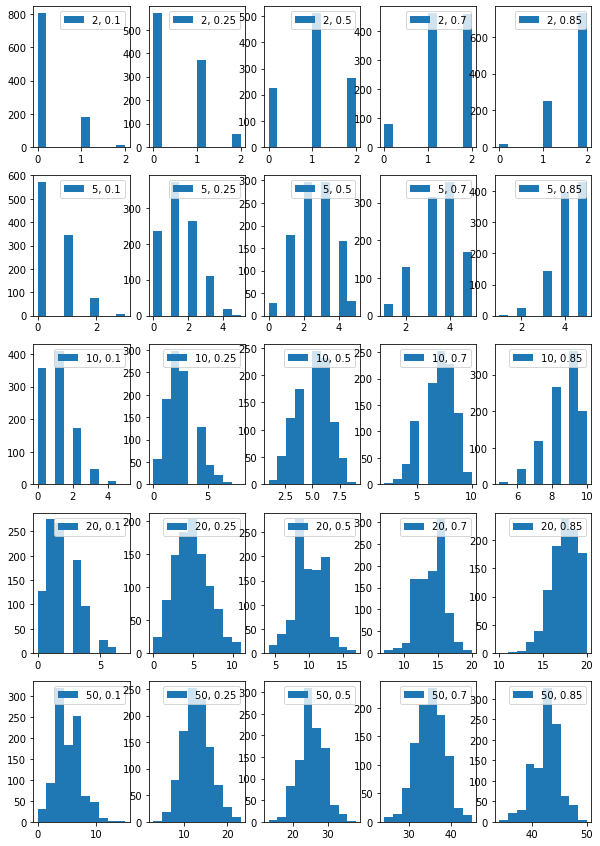

In [2]:
n = [2,5,10,20,50,100]
p = [0.1,0.25,0.5,0.7, 0.85]

fig, ax = plt.subplots(5, 5, figsize = (10,15))

for i in range(5) :
    for j in range(5):
        ax[i,j].hist(np.random.binomial(n[i], p[j], 1000), label=str(n[i]) + ', '+str(p[j]))
        ax[i,j].legend(loc = 'upper right')
plt.show()

n determines the width
p determines the shift 

### b)

A Binomial can be approximated by a Normal distribution N (np, sqrt(np(1-p))) when n>5 and skewness < 0.3

The advantage of using the normal against the binomial is because the binomial, when you have a large n, becomes really computationally expensive as it is necessary to compute the binomial coefficient each time.

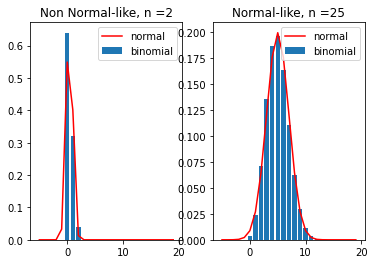

In [4]:
fig, ax = plt.subplots(1,2)
k = np.arange(-5,20, 1)
ax[0].bar(k, binom.pmf(k,2 , 0.2), label ='binomial')
ax[0].plot(k, norm.pdf(k,2*0.2 , np.sqrt(2*0.2*(1-0.2))), label ='normal', color = 'red')
ax[0].legend()
ax[0].set_title('Non Normal-like, n =2')

ax[1].bar(k, binom.pmf(k,25 , 0.2), label = 'binomial')
ax[1].set_title('Normal-like, n =25')
ax[1].plot(k, norm.pdf(k,25*0.2 , np.sqrt(25*0.2*(1-0.2))), label ='normal', color = 'red')
ax[1].legend()


plt.show()

### c)

A Binomial can be approximated by a poisson of a parameter $\lambda$ = np if n ≥ 20 and p ≤ 0.05, or if n ≥ 100 and np ≤ 10

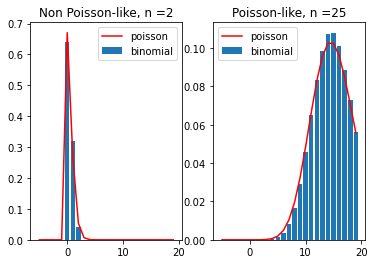

In [179]:
fig, ax = plt.subplots(1,2)
k = np.arange(-5,20, 1)
ax[0].bar(k, binom.pmf(k,2 , 0.2), label ='binomial')
ax[0].plot(k, poisson.pmf(k,2*0.2), label ='poisson', color = 'red')
ax[0].legend()
ax[0].set_title('Non Poisson-like, n =2')

ax[1].bar(k, binom.pmf(k,150 , 0.1), label = 'binomial')
ax[1].set_title('Poisson-like, n =25')
ax[1].plot(k, poisson.pmf(k,150*0.1), label ='poisson', color = 'red')
ax[1].legend()


plt.show()